In [23]:
cd /Users/prasanna/UNCC_stuff/6162-KnowledgeDiscoveryInDatabases/Project

/Users/prasanna/UNCC_stuff/6162-KnowledgeDiscoveryInDatabases/Project


In [24]:
import pandas as pd
stud_df = pd.read_csv('student-mat.csv')
print(stud_df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [25]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
stud_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avgscore,y_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.67,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.33,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.33,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.67,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.67,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,10,15,15,15,15.00,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,1,1,3,0,12,12,11,11.67,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,1,1,6,6,5,6,5.67,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,1,1,1,0,16,18,19,17.67,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,1,5,0,14,15,15,14.67,1


#### Avgscore - New Attribute
add a new attribute avgscore taking the average of G1, G2 and G3.  We'll use this as our target for all data exploration tasks.

In [4]:
stud_df["avgscore"] = ((stud_df["G1"] + stud_df["G2"] + stud_df["G3"])/3).round(2)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#### Checking the Distribution of the new avgscore 

<AxesSubplot:xlabel='avgscore', ylabel='Count'>

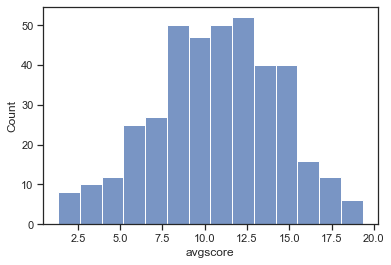

In [6]:
sns.histplot(stud_df.avgscore)

#### Binary classification attribute
Taking a Binary Classification approach, code avgscore < 10 as 0 and avgscore > 10 as 1
This attribute y_binary is only required for predictive modeling.  We dont need to use this for Data exploration purposes.

In [7]:
import numpy as np
stud_df["y_binary"] = np.array((stud_df["avgscore"] > 10) + 0)

### Create file for the data exploration activity and share with the team.

In [14]:
stud_df.to_csv('student-mat-v1.csv', index=False)

## Data Preparation for Modeling
### Datatype Transformation
Ordinal encoding for the first set of transformation and
one hot encoding for the Fjob, Mjob, reason and guardian attributes.

In [8]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

In [9]:
def ordinal_encode(series, categories):
  encoder = OrdinalEncoder(categories=categories, dtype=np.int64)
  return encoder.fit_transform(series.values.reshape(-1, 1))

In [10]:
categories_ordenc = {"school": [["GP","MS"]],
                     "sex": [["F", "M"]],
                     "address": [["R", "U"]],
                     "famsize": [["LE3", "GT3"]],
                     "Pstatus": [['A', 'T']],
                     "schoolsup": [["no", "yes"]],
                     "famsup": [["no", "yes"]],
                     "paid": [["no", "yes"]],
                     "activities": [["no", "yes"]],
                     "nursery": [["no", "yes"]],
                     "higher": [["no", "yes"]],
                     "internet": [["no", "yes"]],
                     "romantic": [["no", "yes"]],
                     }

for column, category in categories_ordenc.items():
  stud_df[column] = ordinal_encode(stud_df[column], category)

In [11]:
def onehot_encode(data, column, categories):
  encoder = OneHotEncoder(categories=categories, drop="first", sparse=False, dtype=np.int64)
  encoded_features = encoder.fit_transform(data[column].values.reshape(-1, 1))
  encoder.transform(data[column].values.reshape(-1, 1))

  data = data.drop(labels=column, axis=1)

  for j, category in enumerate(categories[0][1:]):
    category_column_name = "{}_{}".format(column, category)
    data[category_column_name] = encoded_features[:, j]

  return data

In [12]:
categories_hotenc = {"Fjob": [["other", "teacher", "health", "services", 'at_home']],
                     "Mjob": [["other", "teacher", "health", "services", 'at_home']],
                     "reason": [["other", "home", "reputation", "course"]],
                     "guardian": [["other", "mother", "father"]]}

for column, category in categories_hotenc.items():
  stud_df = onehot_encode(stud_df, column, category)

In [26]:
stud_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Dropping columns
G1, G2 and G3 introduce multicollinearity if retained.  Also avgscore and y_binary were derived from it.
Lastly avgscore is also not required as we will be using the y_binary for the classification models as the target variable.

In [14]:
stud_df = stud_df.drop(['age','G1','G2','G3','avgscore'], axis=1)

### Training and Test Data splits
Using 70-30 ratio for train and test data sets.
y_binary is the target variable.

In [17]:
from sklearn.model_selection import train_test_split
X = stud_df.drop(['y_binary'], axis=1)
y = stud_df['y_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
X_train

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_at_home,Mjob_teacher,Mjob_health,Mjob_services,Mjob_at_home,reason_home,reason_reputation,reason_course,guardian_mother,guardian_father
348,0,0,1,1,1,4,3,1,3,0,...,0,0,1,0,0,0,1,0,1,0
59,0,0,1,1,1,4,2,1,2,0,...,0,0,0,1,0,0,0,1,1,0
120,0,0,1,1,1,1,2,1,2,0,...,0,0,0,0,1,0,0,1,1,0
12,0,1,1,0,1,4,4,1,1,0,...,0,0,1,0,0,0,0,1,0,1
306,0,1,1,1,0,3,2,1,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,1,1,2,2,1,1,0,...,0,0,0,0,0,0,1,0,1,0
255,0,1,1,0,1,1,1,2,1,1,...,0,0,1,0,0,0,0,1,1,0
72,0,0,0,1,1,1,1,1,2,2,...,0,0,0,0,0,0,1,0,1,0
235,0,1,1,1,1,3,2,2,3,0,...,0,0,0,0,1,0,1,0,1,0


In [19]:
X_test

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_at_home,Mjob_teacher,Mjob_health,Mjob_services,Mjob_at_home,reason_home,reason_reputation,reason_course,guardian_mother,guardian_father
146,0,0,1,1,1,3,2,1,2,3,...,0,0,1,0,0,1,0,0,0,1
379,1,0,0,1,1,3,1,1,2,0,...,0,0,0,0,1,0,1,0,1,0
247,0,1,1,1,1,3,1,1,1,3,...,0,0,0,1,0,0,0,0,1,0
197,0,1,0,0,1,3,3,3,1,0,...,0,1,0,0,0,1,0,0,0,1
368,1,0,1,1,1,2,3,2,1,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,1,1,1,1,3,2,2,1,1,...,0,0,0,1,0,0,0,1,1,0
39,0,0,0,1,1,2,2,1,1,0,...,0,0,0,0,1,0,1,0,1,0
163,0,1,1,1,1,1,3,1,1,0,...,0,0,0,0,1,0,0,1,0,1
132,0,0,1,0,1,2,2,1,1,0,...,0,0,0,0,0,0,0,1,0,1


In [20]:
y_train

348    1
59     1
120    1
12     1
306    1
      ..
203    0
255    0
72     0
235    0
37     1
Name: y_binary, Length: 276, dtype: int64

In [21]:
y_test

146    0
379    0
247    0
197    0
368    1
      ..
250    0
39     1
163    0
132    1
284    0
Name: y_binary, Length: 119, dtype: int64